# Project Template


This notebook will be used to house all the code, comments, and analysis needed to complete our group project.

Final code submission will be a python file

## Overview

Owner: Maya

### Summary
This project addresses the question: By building a hate speech detector, how can we measure performance disparities across demographic groups and identify which communities are underserved or over-policed? This is crucial as it aims to reveal potential algorithmic biases, ensuring that AI systems treat all demographic groups fairly and equitably. Identifying these disparities is vital for improving the accountability and transparency of AI technologies.

### Task
Create a hate speech detector and measure performance disparities across demographic groups to identify which communities are underserved or over-policed.

## Domain Problem

Owner: Maya

### Domain Problem
The domain problem here is algorithmic bias and fairness in content moderation systems, specifically in automated hate speech detection.
The core issue is that AI models designed to detect hate speech often perform unevenly across different demographic groups due to several interconnected problems:

Representation bias occurs when training datasets don't equally represent all demographic groups, leading models to be better at detecting hate speech targeting majority groups while missing attacks on underrepresented communities. Disparate performance means the model may have significantly different accuracy rates across groups—for example, it might effectively catch hate speech against one demographic but fail to protect another, leaving vulnerable communities exposed to ongoing harassment.

There's also the risk of over-policing certain groups, where the model disproportionately flags content from particular demographics as hateful even when it isn't, effectively silencing those voices. Intersectional invisibility compounds these issues, as people belonging to multiple marginalized groups (such as Black women or LGBTQ+ individuals with disabilities) often face unique forms of hate speech that models trained primarily on single-axis examples fail to recognize.

### Purpose:
The real-world consequences of these problems are significant: inadequate protection leaves vulnerable communities exposed to harassment and harm on online platforms, uneven enforcement can amplify existing social inequities, and biased moderation systems erode trust in the platforms themselves. This project addresses the critical need to build content moderation systems that protect all users equitably, rather than inadvertently replicating or amplifying societal biases in digital spaces where so much human interaction now occurs.


## Analytic Approach

### Our analytical approach will involve:
This project involves training a hate speech detection model using the Jigsaw Civil Comments dataset, with a strong emphasis on fairness and equity throughout the development process. The work begins by analyzing representation within the training data to identify which demographic groups may be under- or over-represented, ensuring awareness of potential biases from the outset. The trained model is then rigorously evaluated for fairness across multiple demographic groups using HateCheck alongside various performance and fairness metrics to understand how well it serves different populations. To make these findings accessible and actionable, the project includes creating visual dashboards, charts, and intersectional analyses that clearly communicate any disparities in both protection (where harmful content may go undetected for certain groups) and surveillance (where certain groups may be disproportionately flagged). Finally, all of this research culminates in a comprehensive report and presentation that summarizes the findings, documents model performance, and provides actionable insights to guide equitable AI deployment in real-world applications.


Owner: Maya

## Import Libraries & Load data

Owner: Prince

### Libraries & Packages

Install libraries

In [ ]:
!pip install pandas numpy matplotlib seaborn tqdm requests \
    scikit-learn statsmodels fairlearn transformers datasets torch \
    plotly spacy nltk pyarrow fastparquet joblib accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 16.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.3
    Uninstalling scipy-1.16.3:
      Successfully uninstalled scipy-1.16.3


Import all libraries

In [ ]:
# ==============================
# Core Libraries
# ==============================
import os
import gc
import re
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import requests

# Set plot style
sns.set_style("whitegrid")

# ==============================
# Data Preprocessing
# ==============================
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Optional NLP cleaning tools
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
import spacy

# ==============================
# NLP Modeling (Transformers)
# ==============================
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import (
    DistilBertTokenizerFast,
    DistilBertForSequenceClassification,
    Trainer,
    TrainingArguments,
)
from datasets import Dataset as HFDataset

# ==============================
# Statistical Modeling ( Classical Analysis)
# ==============================
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

# ==============================
# Model Evaluation & Fairness
# ==============================
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    r2_score,
    mean_squared_error,
    mean_absolute_error,
)
from fairlearn.metrics import (
    MetricFrame,
    selection_rate,
    false_positive_rate,
    false_negative_rate,
)

# ==============================
# Visualization (Advanced / Interactive)
# ==============================
import plotly.express as px
import plotly.graph_objects as go

# ==============================
# Utility
# ==============================
import joblib  # for saving/loading models
import warnings
warnings.filterwarnings("ignore")

print("All libraries successfully imported and ready to use!")


All libraries successfully imported and ready to use!


### Data Sets

We will be using the following datasets for training, auditing, and evaluating our hate speech detector:

*   Jigsaw Civil Comments (Kaggle)
    *   Contains ~2 million online comments labeled for toxicity and identity mentions.
    *   Key variables include: the comment text, toxicity labels (e.g., toxic, severe toxic), and identity indicators (e.g., race, religion, gender, disability)
    *   This dataset will be used to train the hate speech detection model and analyze representation across demographic groups.
*   HateCheck (Paul Röttger GitHub)
    *   A test suite with 3,728 cases designed to benchmark fairness in hate speech detection models.
    *   Focuses on demographic variations and edge cases in language usage.
    *   This dataset will be used to evaluate model fairness and identify potential biases in predictions.
*   US Census 2020/2022
    *   Provides demographic baseline comparisons, including population proportions by race, ethnicity, and disability.
    *   Key variables include population counts and percentages for different demographic groups.
    *   This dataset will help us compare model representation to real-world demographics, highlighting under- or over-represented communities.



***Note:***

These datasets are separate entities. We will primarily merge the Jigsaw comments with relevant identity and toxicity labels, and use HateCheck and US Census data for evaluation, benchmarking, and fairness analysis. Proper preprocessing and alignment of columns will be required before modeling.

Import Datasets

#### Jigsaw data set

upload kaggle.json to session

In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json when prompted

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"princenewman","key":"2fc96af411117ee0c8d9b69544f0c943"}'}

Set up Kaggle API in Colab

In [ ]:
!rm -rf ~/.kaggle

In [ ]:
# Create the Kaggle directory, move the file, and set permissions
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!cat ~/.kaggle/kaggle.json

{"username":"princenewman","key":"2fc96af411117ee0c8d9b69544f0c943"}

In [ ]:
!kaggle datasets list -s "toxic"

ref                                                           title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
reihanenamdari/youtube-toxicity-data                          Youtube toxic comments                                  99167  2022-08-06 00:08:41.833000           4603         77  1.0              
fizzbuzz/cleaned-toxic-comments                               Cleaned Toxic Comments                               45799147  2018-03-12 05:12:31.550000           4326         88  0.8235294        
julian3833/jigsaw-toxic-comment-classification-challenge      jigsaw-toxic-comment-classification-challenge        55956177  2021-11-11 04:08:25.700000          13734        248  0.7058824        
prokopyev/armor

Download Jigsaw Kaggle dataset

In [ ]:
# download
!kaggle datasets download -d julian3833/jigsaw-toxic-comment-classification-challenge

Dataset URL: https://www.kaggle.com/datasets/julian3833/jigsaw-toxic-comment-classification-challenge
License(s): CC0-1.0
  0% 0.00/53.4M [00:00<?, ?B/s]
100% 53.4M/53.4M [00:00<00:00, 1.03GB/s]


In [ ]:
# Unzip jigsaw kaggle file
!unzip jigsaw-toxic-comment-classification-challenge.zip

Archive:  jigsaw-toxic-comment-classification-challenge.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: test_labels.csv         
  inflating: train.csv               


In [ ]:
# Load the CSVs into Pandas
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

#### Hatecheck Dataset

upload dataset

In [ ]:
from google.colab import files
files.upload()

Saving hatecheck_test_suite_annotations.csv to hatecheck_test_suite_annotations.csv
Saving hatecheck_test_suite_cases.csv to hatecheck_test_suite_cases.csv


{'hatecheck_test_suite_annotations.csv': b',functionality,case_id,templ_id,test_case,label_gold,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9,label_10,count_label_h,count_label_nh,label_annot_maj\n0,derog_neg_emote_h,1,1,I hate women. ,hateful,hateful,,,hateful,,,hateful,hateful,,hateful,5,0,hateful\n1,derog_neg_emote_h,2,1,I hate trans people. ,hateful,hateful,hateful,hateful,hateful,,,,,,hateful,5,0,hateful\n2,derog_neg_emote_h,3,1,I hate gay people. ,hateful,,hateful,hateful,,,hateful,,,hateful,hateful,5,0,hateful\n3,derog_neg_emote_h,4,1,I hate black people. ,hateful,hateful,hateful,hateful,,,,,,hateful,hateful,5,0,hateful\n4,derog_neg_emote_h,5,1,I hate disabled people. ,hateful,,,,,hateful,hateful,hateful,hateful,hateful,,5,0,hateful\n5,derog_neg_emote_h,6,1,I hate Muslims. ,hateful,hateful,,,hateful,,,hateful,hateful,,hateful,5,0,hateful\n6,derog_neg_emote_h,7,1,I hate immigrants. ,hateful,,hateful,,hateful,,hateful,,hateful,,hateful,5,0,hateful\n7,dero

In [ ]:
# load Hatecheck CSVs into pandas
hatecheck_cases = pd.read_csv("hatecheck_test_suite_cases.csv")
hatecheck_annotations = pd.read_csv("hatecheck_test_suite_annotations.csv")

#### US Census dataset

upload dataset

In [ ]:
from google.colab import files
files.upload()

Saving us_census_demographics.xlsx to us_census_demographics.xlsx


{'us_census_demographics.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00A7\x82\xcfn\x01\x00\x00\x04\x05\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [ ]:
# Load the US Census Excel file into pandas
census = pd.read_excel("us_census_demographics.xlsx")

### Check that each dataset imported successfully

In [ ]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [ ]:
pd.set_option('display.max_columns', None)
hatecheck_cases.head()

,Unnamed: 0,functionality,case_id,test_case,label_gold,target_ident,direction,focus_words,focus_lemma,ref_case_id,ref_templ_id,templ_id,case_templ
0,0,derog_neg_emote_h,1,I hate women.,hateful,women,general,hate,hate,NaN,NaN,1,I hate [IDENTITY_P].
1,1,derog_neg_emote_h,2,I hate trans people.,hateful,trans people,general,hate,hate,NaN,NaN,1,I hate [IDENTITY_P].
2,2,derog_neg_emote_h,3,I hate gay people.,hateful,gay people,general,hate,hate,NaN,NaN,1,I hate [IDENTITY_P].
3,3,derog_neg_emote_h,4,I hate black people.,hateful,black people,general,hate,hate,NaN,NaN,1,I hate [IDENTITY_P].
4,4,derog_neg_emote_h,5,I hate disabled people.,hateful,disabled people,general,hate,hate,NaN,NaN,1,I hate [IDENTITY_P].


In [ ]:
hatecheck_annotations.head()

,Unnamed: 0,functionality,case_id,templ_id,test_case,label_gold,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9,label_10,count_label_h,count_label_nh,label_annot_maj
0,0,derog_neg_emote_h,1,1,I hate women.,hateful,hateful,NaN,NaN,hateful,NaN,NaN,hateful,hateful,NaN,hateful,5,0,hateful
1,1,derog_neg_emote_h,2,1,I hate trans people.,hateful,hateful,hateful,hateful,hateful,NaN,NaN,NaN,NaN,NaN,hateful,5,0,hateful
2,2,derog_neg_emote_h,3,1,I hate gay people.,hateful,NaN,hateful,hateful,NaN,NaN,hateful,NaN,NaN,hateful,hateful,5,0,hateful
3,3,derog_neg_emote_h,4,1,I hate black people.,hateful,hateful,hateful,hateful,NaN,NaN,NaN,NaN,NaN,hateful,hateful,5,0,hateful
4,4,derog_neg_emote_h,5,1,I hate disabled people.,hateful,NaN,NaN,NaN,NaN,hateful,hateful,hateful,hateful,hateful,NaN,5,0,hateful


In [ ]:
census.head()

,table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Annual Estimates of the Resident Population by...,NaN,NaN,NaN,NaN,NaN,NaN
1,"Sex, Race, and Hispanic Origin","April 1, 2020\nEstimates Base",Population Estimate (as of July 1),NaN,NaN,NaN,NaN
2,NaN,NaN,2020,2021.0,2022.0,2023.0,2024.0
3,TOTAL POPULATION,331515736,331577720,332099760.0,334017321.0,336806231.0,340110988.0
4,.One Race:,NaN,NaN,NaN,NaN,NaN,NaN


## Initial Exploration of Data

Instead of working through each attribute for the dataset, we will create a function that ouputs all the information we want for each dataframe.

This will be called describe_dataset()

In [ ]:
# Define a reusable dataset summary function

def describe_dataset(df, name="Dataset"):
    print(f" {name.upper()} SUMMARY")
    print("-" * 40)

    # Dataset type
    print(f"Type: {type(df)}")

    # Dimensions
    print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")

    # RangeIndex information
    if isinstance(df.index, pd.RangeIndex):
        print(f"RangeIndex: start={df.index.start}, stop={df.index.stop}, step={df.index.step}")
    else:
        print(f"Index type: {type(df.index)}")

    # Memory usage
    mem = df.memory_usage(deep=True).sum() / (1024 ** 2)
    print(f"Memory Usage: {mem:.2f} MB")
    print("\n")

    # Column names
    print(" Column Names:")
    print(df.columns.tolist())
    print("\n")

    # Data types
    print(" Data Types:")
    print(df.dtypes)
    print("\n")

    # Missing values
    print(" Missing Values (top 10):")
    print(df.isna().sum().sort_values(ascending=False).head(10))
    print("\n")

    # Preview
    print(" Preview (first 5 rows):")
    print(df.head())
    print("\n Summary complete.")

### Analyse Each Dataset as they are now

#### Jigsaw Train

##### `describe_dataset()`
use this function to describe the dataset

In [ ]:
describe_dataset(train, "Jigsaw Train")

 JIGSAW TRAIN SUMMARY
----------------------------------------
Type: <class 'pandas.core.frame.DataFrame'>
Shape: 159571 rows × 8 columns
RangeIndex: start=0, stop=159571, step=1
Memory Usage: 94.72 MB


 Column Names:
['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


 Data Types:
id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object


 Missing Values (top 10):
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


 Preview (first 5 rows):
                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2

##### Colummn details
for the ones we will focus on

In [ ]:
train['comment_text'].describe()   # this contains

,comment_text
count,159571
unique,159571
top,"""\nAnd ... I really don't think you understand..."
freq,1


In [ ]:
train['toxic'].describe()

,toxic
count,159571.000000
mean,0.095844
std,0.294379
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Columns to Keep for Later / Optional Analysis

In [ ]:
train['id']

,id
0,0000997932d777bf
1,000103f0d9cfb60f
2,000113f07ec002fd
3,0001b41b1c6bb37e
4,0001d958c54c6e35
...,...
159566,ffe987279560d7ff
159567,ffea4adeee384e90
159568,ffee36eab5c267c9
159569,fff125370e4aaaf3


In [ ]:
train['identity_hate'].describe()

,identity_hate
count,159571.000000
mean,0.008805
std,0.093420
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


**Column Overview**


`comment_text` → feature (Input)

The actual user comment text from online platforms. Each row is one comment, written in natural language — it may be toxic, non-toxic, insulting, or neutral.

    - Why it’s relevant: This is the main feature (input variable) that our NLP model will analyze.
    - How we’ll use it:
      - Text preprocessing: We’ll clean and process this text (remove noise, tokenize, embed) to extract patterns that predict toxicity.
      - Sentiment and toxicity feature extraction feeding into ML/DL models like DistilBERT for training and prediction

`toxic` → Primary Target (Output)

A binary indicator (0 or 1) showing whether the comment is toxic (1) or not (0). This is our label for supervised learning.

    - Why it’s relevant: It’s the target variable your model is trying to predict. The training process learns patterns in comment_text that correlate with toxicity.
    - How we’ll use it:
        - As the dependent variable (y) during model training
        - For evaluating prediction accuracy, recall, precision, etc.
        - For bias analysis to see if the model unfairly flags certain identities


**Columns to Keep for Later / Optional Analysis**

`id` → Identifier

A unique string ID for each comment in the dataset.

    - Why it’s relevant:
      - For tracking, joining datasets, or debugging specific samples.
      - Essential when merging this dataset with external data (like HateCheck or demographic info).

    - How we’ll use it:
      - Keep it for merges and reference
      - Drop it temporarily during modeling since it’s not predictive


`identity_hate` → Bias-Related Label

A binary flag (0 or 1) showing if the comment targets a person or group based on identity (race, gender, religion, etc.).

    - Why it’s relevant: for the fairness and bias, to evaluate if our toxicity model is biased against identity-related language.
    - How you’ll use it:
        - As a subgroup filter in fairness metrics
        - To compare model accuracy, FPR/FNR for identity vs non-identity comments


##### Summary

Based off of the output above, we can observe the following for this dataset:

- It's a Pandas DataFrame

- Has a memory size of 94.72 MB.

- Consists of 8 columns and 159571 entries/rows.

- **The columns we need for our analysis are**:
  - comment_text (object): the text content of the comment.
  - id (object):a unique identifier for the comment.
  - toxic (int64): a binary (0 or 1) label indicating if the comment is toxic.
  - identity_hate (int64): a binary label for comments containing identity hate.


- **Missing Values and Data Integrity**
  - There are no missing values in the top 10 rows for any of the variables: id, comment_text, toxic, identity_hate.
  - The dataset appears to be complete for these variables in the preview, with a value of 0 for missing values in all listed columns.

- **Some changes we may want to make**
  - **Text Normalization on `comment_text`**
    - Case Folding: Convert all text to lowercase to ensure consistency (e.g., 'INSULT' and 'insult' are treated as the same word).
    - Remove Punctuation/Special Characters: Eliminate symbols, emojis, and non-standard characters
    - Remove Stop Words: Eliminate very common words (e.g., 'the', 'a', 'is') that add little value to classification
  
  - **Feature Creation on `comment_text`**
    - comment_length: The total number of characters in the comment.
    - word_count: The total number of words in the comment.
    - unique_word_count: The number of unique words in the comment
  - **Target Variable Handling:** While the toxic and identity_hate columns are already binary (int64), we may need to
    - Check and Address Class Imbalance: Quantify the ratio of "1"s (toxic/hate) to "0"s (non-toxic/non-hate)
    -  Address Imbalance (if significant): Use resampling techniques (e.g., oversampling the minority class or undersampling the majority class), or Employ weighted loss functions during model training to give more importance to the rare positive examples.


#### Jigsaw Test

##### `describe_dataset()`

In [ ]:
describe_dataset(test, "Jigsaw Test")

 JIGSAW TEST SUMMARY
----------------------------------------
Type: <class 'pandas.core.frame.DataFrame'>
Shape: 153164 rows × 2 columns
RangeIndex: start=0, stop=153164, step=1
Memory Usage: 79.56 MB


 Column Names:
['id', 'comment_text']


 Data Types:
id              object
comment_text    object
dtype: object


 Missing Values (top 10):
id              0
comment_text    0
dtype: int64


 Preview (first 5 rows):
                 id                                       comment_text
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1  0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2  00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3  00017563c3f7919a  :If you have a look back at the source, the in...
4  00017695ad8997eb          I don't anonymously edit articles at all.

 Summary complete.


##### Column details

In [ ]:
test['id'].describe()

,id
count,153164
unique,153164
top,ffffce3fb183ee80
freq,1


In [ ]:
test['comment_text'].describe()

,comment_text
count,153164
unique,153164
top,""" \n :::Stop already. Your bullshit is not wel..."
freq,1


**Column Overview**

`id` → unique reference (helps match outputs)

`comment_text` → main text feature (used by the model to predict toxicity)

##### Summary

Based off of the output above, we can observe the following for this dataset:

- it's a Pandas DataFrame.
- Has a memory size of 79.56 MB.
- Consists of 2 columns and 153164 entries/rows.
- Column Details
  - The dataset only contains the features needed for prediction
  - The columns are:
    - `id`
    - `comment_text`
  - Both columns are of data type object (representing strings/text).

- Missing values
There are no missing values in the top 10 rows for either of the two columns: id and comment_text.

- Changes we can make
  - Preprocessing Alignment: Any preprocessing steps (Tokenization, Text Normalization, Feature Engineering) applied to the comment_text column in the Training set must be identically applied to the comment_text column in this Test set before making predictions.

#### Hatecheck Cases Dataset

##### `describe_dataset`( )

In [ ]:
describe_dataset(hatecheck_cases, "Hatecheck Cases")

 HATECHECK CASES SUMMARY
----------------------------------------
Type: <class 'pandas.core.frame.DataFrame'>
Shape: 3728 rows × 13 columns
RangeIndex: start=0, stop=3728, step=1
Memory Usage: 2.07 MB


 Column Names:
['Unnamed: 0', 'functionality', 'case_id', 'test_case', 'label_gold', 'target_ident', 'direction', 'focus_words', 'focus_lemma', 'ref_case_id', 'ref_templ_id', 'templ_id', 'case_templ']


 Data Types:
Unnamed: 0         int64
functionality     object
case_id            int64
test_case         object
label_gold        object
target_ident      object
direction         object
focus_words       object
focus_lemma       object
ref_case_id      float64
ref_templ_id     float64
templ_id           int64
case_templ        object
dtype: object


 Missing Values (top 10):
ref_case_id      1682
ref_templ_id     1390
target_ident      292
functionality       0
Unnamed: 0          0
label_gold          0
test_case           0
case_id             0
direction           0
focus_lemma     

##### Column details
for the columns we will focus on

In [ ]:
hatecheck_cases['functionality']

,functionality
0,derog_neg_emote_h
1,derog_neg_emote_h
2,derog_neg_emote_h
3,derog_neg_emote_h
4,derog_neg_emote_h
...,...
3723,spell_leet_h
3724,spell_leet_h
3725,spell_leet_h
3726,spell_leet_h


In [ ]:
hatecheck_cases['case_id']

,case_id
0,1
1,2
2,3
3,4
4,5
...,...
3723,3897
3724,3898
3725,3899
3726,3900


In [ ]:
hatecheck_cases['test_case']

,test_case
0,I hate women.
1,I hate trans people.
2,I hate gay people.
3,I hate black people.
4,I hate disabled people.
...,...
3723,Gay people are all complete 4ssholes.
3724,Black people are all complete 4ssholes.
3725,Disabled people are all complete 4ssholes.
3726,Muslims are all complete 4ssholes.


In [ ]:
hatecheck_cases['label_gold'].describe()

,label_gold
count,3728
unique,2
top,hateful
freq,2563


In [ ]:
hatecheck_cases['target_ident'].describe()

,target_ident
count,3436
unique,7
top,gay people
freq,551


In [ ]:
hatecheck_cases['direction'].describe()

,direction
count,3728
unique,3
top,general
freq,1618


##### Summary

Based off of the output above, we can observe the following for this dataset:

- it's a Pandas DataFrame.
- Has a memory size of 2.07 MB.
- Consists of 13 columns and 3728 entries/rows.
- Column Details & Data Types
  - `functionality`:	The specific test category or function being evaluated.
  - `case_id`:	A unique identifier for the specific test case.
  - `test_case`:	The actual text content of the test case/sentence.
  - `label_gold`:	The correct (gold) label for the test case (e.g., 'hate' or 'not hate').
  - `target_ident`:	The target identity mentioned in the test case (e.g., 'Muslims', 'women').
  - `direction`:	Possibly indicating the nature of the test (e.g., 'direct' or 'implicit').


- Missing Values
  - There are missing values in `target_ident` - 292
  - All other listed columns show 0 missing values in the top 10 rows.
  - The `target_ident` column is important for fairness analysis but has 292 missing values. These rows will need to be imputed

#### Hatecheck Annotations dataset

##### `describe_dataset()`

In [ ]:
describe_dataset(hatecheck_annotations, "Hatecheck Annotations")

 HATECHECK ANNOTATIONS SUMMARY
----------------------------------------
Type: <class 'pandas.core.frame.DataFrame'>
Shape: 3728 rows × 19 columns
RangeIndex: start=0, stop=3728, step=1
Memory Usage: 2.71 MB


 Column Names:
['Unnamed: 0', 'functionality', 'case_id', 'templ_id', 'test_case', 'label_gold', 'label_1', 'label_2', 'label_3', 'label_4', 'label_5', 'label_6', 'label_7', 'label_8', 'label_9', 'label_10', 'count_label_h', 'count_label_nh', 'label_annot_maj']


 Data Types:
Unnamed: 0          int64
functionality      object
case_id             int64
templ_id            int64
test_case          object
label_gold         object
label_1            object
label_2            object
label_3            object
label_4            object
label_5            object
label_6            object
label_7            object
label_8            object
label_9            object
label_10           object
count_label_h       int64
count_label_nh      int64
label_annot_maj    object
dtype: object


 Mis

##### Column details

In [ ]:
hatecheck_annotations['functionality'].describe()

,functionality
count,3728
unique,29
top,ident_pos_nh
freq,189


In [ ]:
hatecheck_annotations['case_id'].describe()   # dtype appears different (float) from the one in describe_dataset summary (int). need to convert key to int

,case_id
count,3728.000000
mean,1935.968079
std,1131.775340
min,1.000000
25%,957.750000
50%,1921.500000
75%,2927.250000
max,3901.000000


In [ ]:
hatecheck_annotations['test_case'].describe()

,test_case
count,3728
unique,3728
top,Too many camelfuck3rs in this country.
freq,1


In [ ]:
hatecheck_annotations['label_gold'].describe()

,label_gold
count,3728
unique,2
top,hateful
freq,2563


In [ ]:
hatecheck_annotations[[f"label_{i}" for i in range(1, 11)]].describe(include='all')

,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9,label_10
count,1854,1861,1844,1867,1855,1874,1867,1884,1861,1873
unique,2,2,2,2,2,2,2,2,2,2
top,hateful,hateful,hateful,hateful,hateful,hateful,hateful,hateful,hateful,hateful
freq,1290,1209,1274,1292,1294,1286,1344,1295,1303,1281


In [ ]:
hatecheck_annotations['count_label_h'].describe()

,count_label_h
count,3728.000000
mean,3.451717
std,2.254966
min,0.000000
25%,0.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
hatecheck_annotations['count_label_nh'].describe()

,count_label_nh
count,3728.000000
mean,1.548283
std,2.254966
min,0.000000
25%,0.000000
50%,0.000000
75%,5.000000
max,5.000000


In [ ]:
hatecheck_annotations['label_annot_maj'].describe()

,label_annot_maj
count,3728
unique,2
top,hateful
freq,2563


##### Summary

Based off of the output above, we can observe the following for this dataset:

- It's a Pandas DataFrame.
- Has a memory size of 2.71 MB.
- Consists of 19 columns and 3728 entries/rows.
- **Column Details & Data Types:** The dataset combines the base test cases with multiple annotator labels, only the columns we need:
    - `functionality`: The specific test function being evaluated.
    - `case_id`:	Unique identifier for the test case.
    - `test_case`:	The actual text of the test case (e.g., "I hate women.").
    - `label_gold`:	The correct (gold) label for the test case (e.g., 'hateful').
    - `count_label_h`: Count of annotators who labeled the case as 'hateful'.
    - `count_label_nh`:	Count of annotators who labeled the case as 'not hateful'.
    - `label_annot_maj`:	The majority label derived from the annotator votes.

Optional (to use if we want to study annotator agreement or label uncertainty)
- `label_1` to `label_10`:	The individual labels provided by up to 10 different human annotators.

- **Missing Values**:
    - A significant number of the individual annotator label columns have missing values, indicating that not every case was reviewed by all 10 annotators
    - All core feature columns (functionality, case_id, test_case, label_gold, count_label_h, count_label_nh, label_annot_maj) show 0 missing values.


What changes can we make:
- **Target Label**: The columns `label_gold` (pre-defined correct label) and label_annot_maj (majority human vote) are the most relevant target labels for model evaluation.

- **Missing Label Data**: The missing values in the label_X columns are expected and simply mean that those specific annotators did not review those specific cases. These columns are primarily for inter-annotator agreement analysis and do not need imputation for standard model training/testing, as the summary statistics (count_label_h, count_label_nh) and the final label (label_annot_maj) are complete.


#### US Census

##### `describe_dataset()`

In [ ]:
describe_dataset(census, "US Census")

 US CENSUS SUMMARY
----------------------------------------
Type: <class 'pandas.core.frame.DataFrame'>
Shape: 136 rows × 7 columns
RangeIndex: start=0, stop=136, step=1
Memory Usage: 0.03 MB


 Column Names:
['table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts)', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6']


 Data Types:
table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts)     object
Unnamed: 1                                                                                                       object
Unnamed: 2                                                                                                       object
Unnamed: 3                                                                                                      float64
Unnamed: 4                                                                                         

#####  Summary

This dataset contains Annual Estimates of the Resident Population by "Sex, Race, and Hispanic Origin" from the U.S. Census Bureau. It is intended to provide demographic reference data.

Based off of the output above, we can observe the following for this dataset:
- It's a Pandas DataFrame.
- Has a memory size of only 0.03 MB (very small).
- Consists of 7 columns and 136 entries/rows.
- Column Details & Data Types:
    - The columns have been loaded with generic names (Unknown)
    - Missing Values
    - There are numerous missing values across all columns, especially in the generic, auto-assigned columns


**Observations & Essential Cleaning Steps**

- **Header Mess**: The first few rows (0 through 3 in the preview) contain the actual header information and table description, which is common when reading raw files. These rows have been mistakenly included as data entries.

**Required Changes (Mandatory Cleaning)**:

  - **Set New Headers**: The top 3-4 rows will be concatenated to create meaningful column names (e.g., using a combination of data from rows 0, 3, and 4).
  - **Remove Descriptive Rows**: The first few rows that describe the table (e.g., "Annual Estimates...") must be dropped from the data to start the analysis from the actual numerical entries (Row 4 or 5 onward).

  - Convert Data Types: The columns containing the year estimates (Unnamed: 3 through Unnamed: 6) should be confirmed as numerical (float64 is acceptable, but converting to int64 may be preferred if estimates are discrete counts).

**Next steps**:
- Clean the dataset to correctly parse the header rows - properly set the headers and remove descriptive rows.

#### Overall Data Assets Summary

The project utilizes three distinct types of data:
- The primary Jigsaw NLP data (Train and Test)
- The HateCheck evaluation data (Cases and Annotations)
- External US Census demographic reference data.


**NLP (Toxicity) Datasets**
- **Jigsaw Train**: The largest primary dataset, it is a multi-label classification set (text and 6 binary toxicity labels). Data types are correct (object for text, int64 for labels). Has no missing values in the core columns.

- **Jigsaw Test**: Contains 153,164 rows but only 2 columns (id, comment_text). It is structurally clean (no missing values) and is used for making predictions (it lacks the target labels).


**Evaluation (HateCheck) Datasets**
- **HateCheck Cases**: It is a tidy evaluation set but has a significant amount of missing values in the reference ID columns (ref_case_id, ref_templ_id) and some in target_ident.

**HateCheck Annotations**: It has a very large number of missing values in the individual label_1 through label_10 columns, which is expected as not every annotator reviewed every case. Core features and majority labels are complete.

**Reference (Demographic) Dataset**
- **US Census Summary**: It is in an untidy/messy format with descriptive text incorrectly read as headers and initial rows. It has a high number of missing values (up to 27 per column) due to the poor initial loading, requiring mandatory cleaning and header setting before any analysis can be performed.

### Are our primary data (Jigsaw  Train) suitable for answering the question?

We want to perform quick exploratory data analysis to determine whether our primary data (Jigsaw Train Dataset) are sufficient to answer our question. If the data are not sufficient, we do not want to waste time doing anything that will not be productive

We will make a pair plot to explore relationships betweeen the variables.

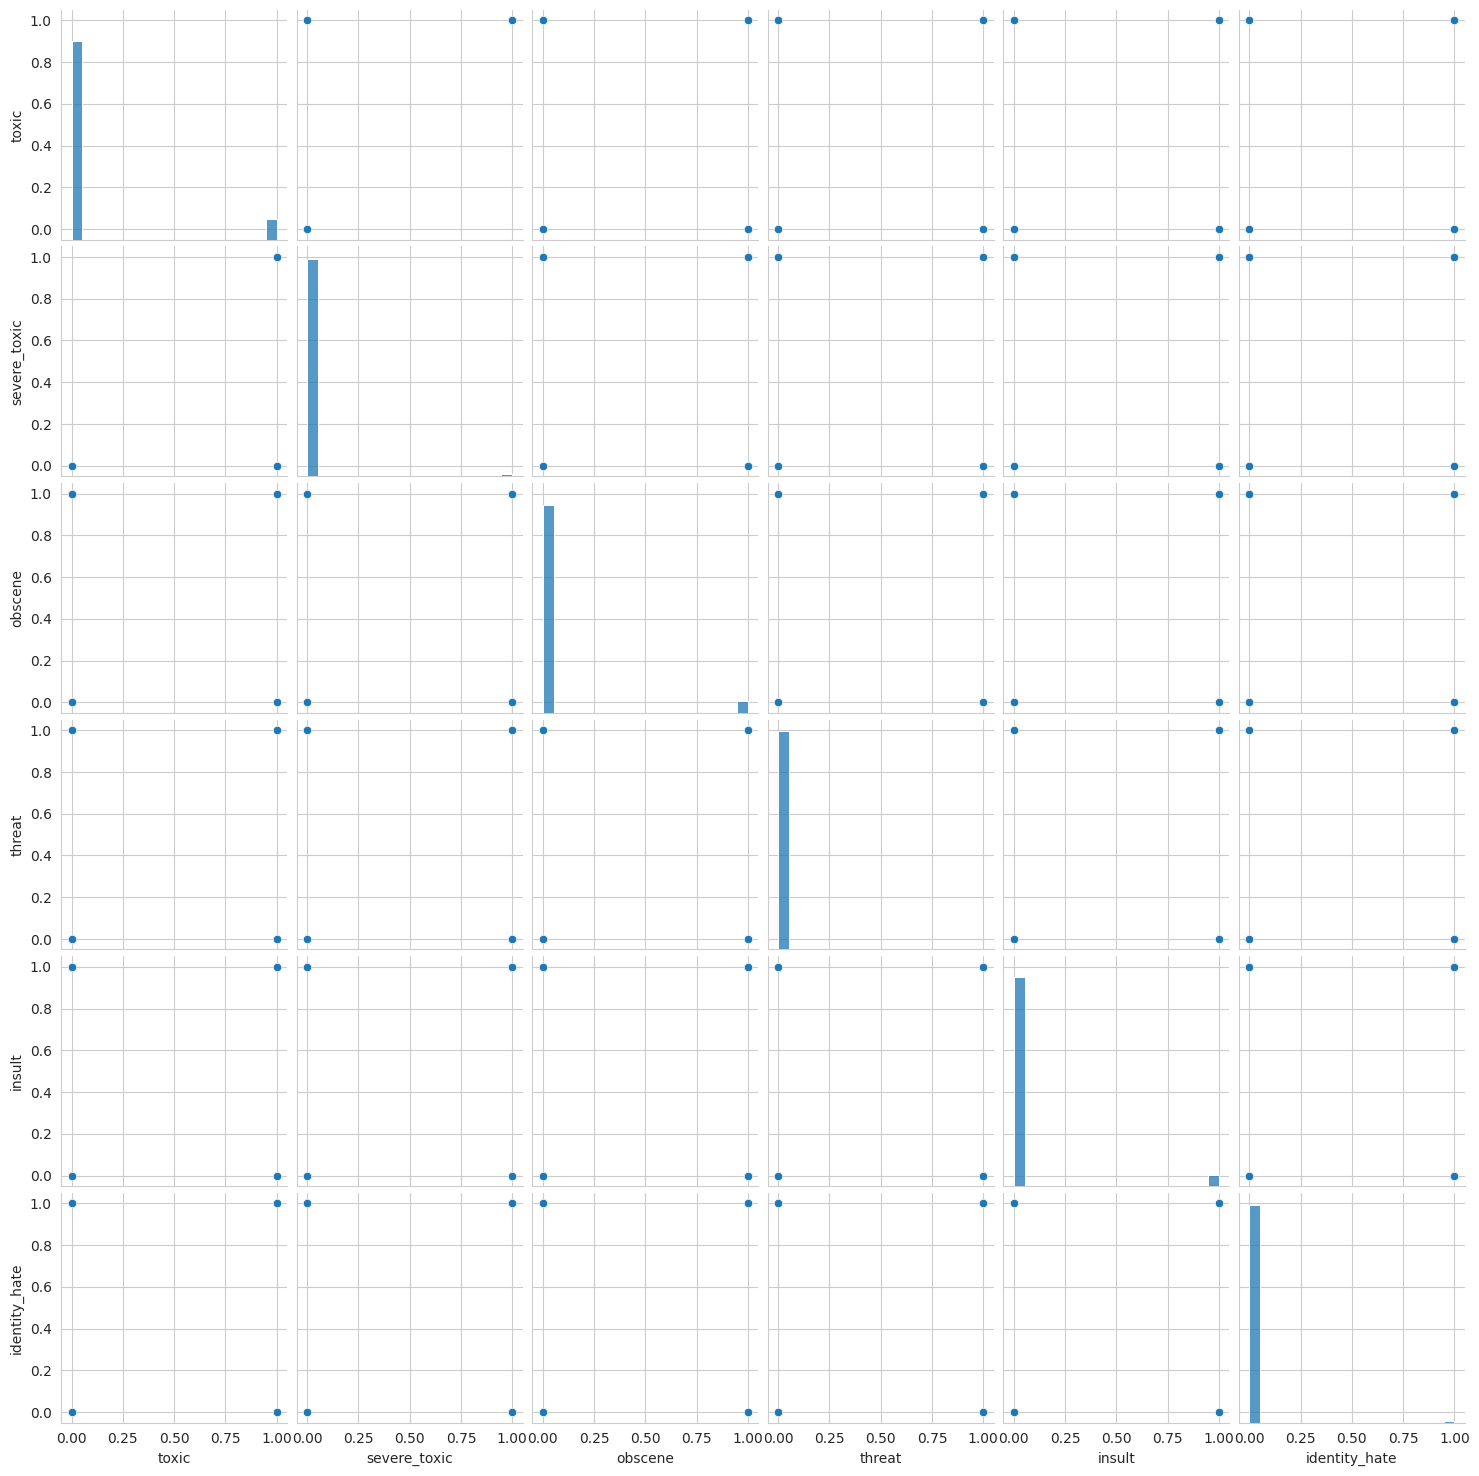

In [ ]:
sns.pairplot(
    train.drop(columns="id"));
plt.show()

Key Observations from the Pairplot:

1. The Challenge: Class Imbalance

    - Vast Majority are Negative: For every toxicity label (toxic, insult, identity\_hate, etc.), the plots clearly show that the overwhelming majority of comments are not labeled as positive (clustered at the y=0 mark).

    - This confirms severe class imbalance. We must use techniques like weighted loss or oversampling to properly train the model to detect the rare positive comments.

2. Label Relationships

   - Strong Co-occurrence: There is a high correlation among toxic, obscene, and insult. If a comment is insulting or obscene, it's very likely to also be labeled as generally toxic
    - Rarer, Unique Labels: The labels threat and our target identity_hate co-occur much less frequently with the others. These phenomena are more distinct and will be harder to predict.
3. Focus on Our Targets
- `toxic`: This is the most common positive label, providing the largest base of examples for our primary classification task
- `identity_hate`: This is one of the rarest labels. Because its positive examples are sparse, predicting it accurately will require aggressive imbalance-handling strategies.

In summary, **the data is usable**, but the severe imbalance, especially for identity_hate, is the primary factor dictating our modeling strategy.

**Correlation Heatmap to quantify the co-occurrence of the labels**

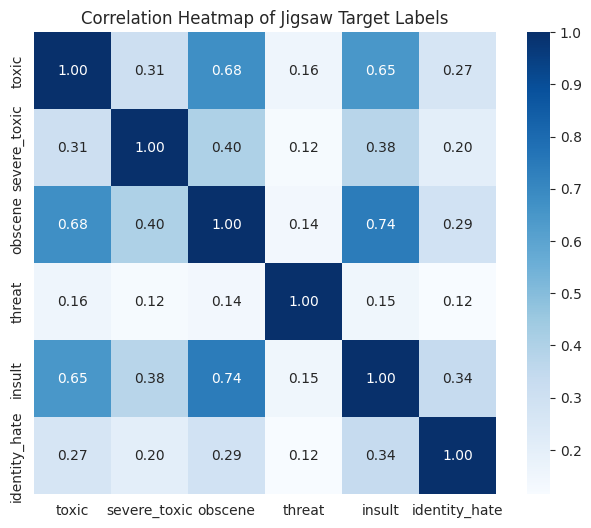

In [ ]:
# Select only the numeric target columns
target_cols = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

# Compute correlation matrix
corr = train[target_cols].corr()

# Plot a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f", square=True)
plt.title("Correlation Heatmap of Jigsaw Target Labels")
plt.show()

**Count Plot of Positives (Visualizing Imbalance)**

This bar chart provides the clearest visual of the Class Imbalance by plotting the absolute count of positive comments for each label (the total number of '1's in each column)

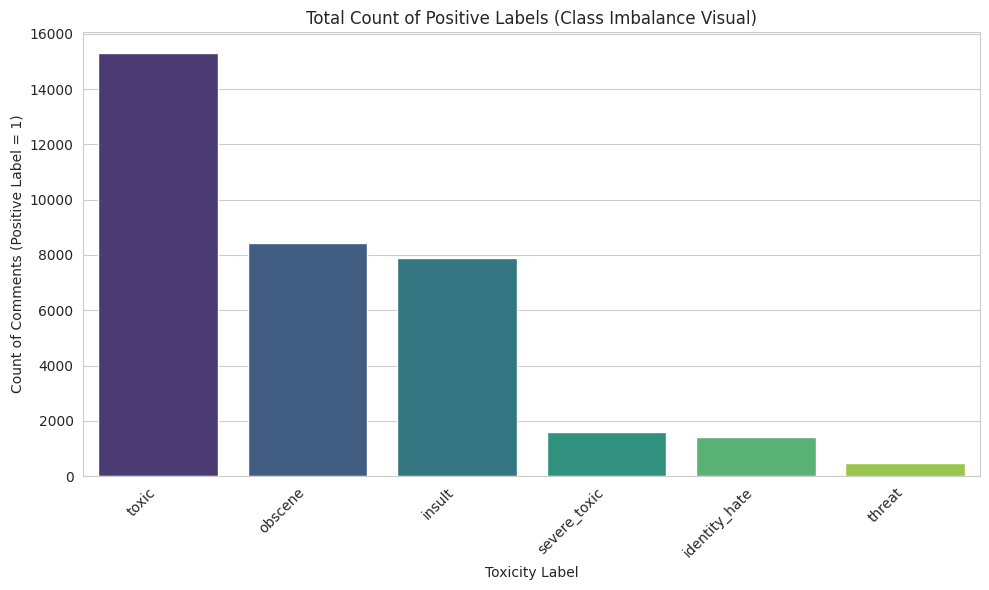

In [ ]:
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Sum all positive examples (1s) for each label and sort them
positive_counts = train[label_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=positive_counts.index,
    y=positive_counts.values,
    palette='viridis'
)
plt.title('Total Count of Positive Labels (Class Imbalance Visual)')
plt.ylabel('Count of Comments (Positive Label = 1)')
plt.xlabel('Toxicity Label')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### **Visual EDA Summary**


1. There is a strong positive correlation between the primary toxicity labels, especially among toxic, obscene, and insult, suggesting these labels frequently co-occur in comments.
2. The labels threat and identity_hate show weaker correlation with the general toxicity categories, indicating these are distinct phenomena that will require unique feature patterns for prediction.
3. The data suffers from severe class imbalance, as confirmed by the count plot showing that positive examples for all categories, especially identity_hate and severe_toxic, are a small minority of the total comments.
4. We should have confidence that it is worthwhile to spend time preparing the data for analysis, as all required target variables have sufficient (though imbalanced) positive examples to proceed with model training


**Further Note: Addressing the class imbalances**
- Since the data is suitable but challenging, our next steps will need to incorporate methods to counteract this imbalance, such as:
    - Resampling Techniques: Artificially balancing the dataset (e.g., Oversampling the minority class or Undersampling the majority class).
    - Algorithmic Adjustments: Using Class Weights to tell the model that misclassifying a minority class example (a '1') is 10 or 100 times worse than misclassifying a majority class example (a '0').

### Data Preparation 1

#### Add any additonal columns

##### Feature Creation on `comment_text`
We will create three clean, foundational text-based features that are extremely useful for understanding comment structure and later improving model performance.

In [ ]:
# comment_length: total number of characters in the comment
train["comment_length"] = train["comment_text"].apply(len)

# word_count: total number of words in the comment
train["word_count"] = train["comment_text"].apply(lambda x: len(x.split()))

# unique_word_count: number of unique words in the comment
train["unique_word_count"] = train["comment_text"].apply(lambda x: len(set(x.split())))

In [ ]:
# Preview the new columns
train[["comment_text", "comment_length", "word_count", "unique_word_count"]].head()

,comment_text,comment_length,word_count,unique_word_count
0,Explanation\nWhy the edits made under my usern...,264,43,41
1,D'aww! He matches this background colour I'm s...,112,17,17
2,"Hey man, I'm really not trying to edit war. It...",233,42,39
3,"""\nMore\nI can't make any real suggestions on ...",622,113,82
4,"You, sir, are my hero. Any chance you remember...",67,13,13


In [ ]:
# check updated columns on Jigsaw train
train.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'comment_length', 'word_count',
       'unique_word_count'],
      dtype='object')

#### Keep relevant columns


Jigsaw Train Dataset

In [ ]:
train = train[["id", "comment_text", "toxic", "identity_hate", "comment_length", "word_count", "unique_word_count"]]

In [ ]:
train.head()

,id,comment_text,toxic,identity_hate,comment_length,word_count,unique_word_count
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,264,43,41
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,112,17,17
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,233,42,39
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,622,113,82
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,67,13,13


Hatecheck Cases Dataset

In [ ]:
hatecheck_cases = hatecheck_cases[["functionality", "case_id", "test_case", "label_gold", "target_ident", "direction"]]

In [ ]:
hatecheck_cases.head()

,functionality,case_id,test_case,label_gold,target_ident,direction
0,derog_neg_emote_h,1,I hate women.,hateful,women,general
1,derog_neg_emote_h,2,I hate trans people.,hateful,trans people,general
2,derog_neg_emote_h,3,I hate gay people.,hateful,gay people,general
3,derog_neg_emote_h,4,I hate black people.,hateful,black people,general
4,derog_neg_emote_h,5,I hate disabled people.,hateful,disabled people,general


Hatecheck Annotations dataset

In [ ]:
hatecheck_annotations = hatecheck_annotations[["functionality", "case_id", "test_case", "label_gold", "count_label_h", "count_label_nh", "label_annot_maj"]]

In [ ]:
hatecheck_annotations.head()

,functionality,case_id,test_case,label_gold,count_label_h,count_label_nh,label_annot_maj
0,derog_neg_emote_h,1,I hate women.,hateful,5,0,hateful
1,derog_neg_emote_h,2,I hate trans people.,hateful,5,0,hateful
2,derog_neg_emote_h,3,I hate gay people.,hateful,5,0,hateful
3,derog_neg_emote_h,4,I hate black people.,hateful,5,0,hateful
4,derog_neg_emote_h,5,I hate disabled people.,hateful,5,0,hateful


#### Rename columns

##### for HateCheck Cases Dataset

In [ ]:
hatecheck_cases = hatecheck_cases.rename(columns={
    'label_gold': 'true_label', 'target_ident': 'target_identity', 'direction': 'directionality'
})

In [ ]:
hatecheck_cases.head()

,functionality,case_id,test_case,true_label,target_identity,directionality
0,derog_neg_emote_h,1,I hate women.,hateful,women,general
1,derog_neg_emote_h,2,I hate trans people.,hateful,trans people,general
2,derog_neg_emote_h,3,I hate gay people.,hateful,gay people,general
3,derog_neg_emote_h,4,I hate black people.,hateful,black people,general
4,derog_neg_emote_h,5,I hate disabled people.,hateful,disabled people,general


for Hatecheck Annotations Dataset

In [ ]:
hatecheck_annotations = hatecheck_annotations.rename(columns={
    'label_annot_maj': 'majority_label'
})

In [ ]:
hatecheck_annotations.head()

,functionality,case_id,test_case,label_gold,count_label_h,count_label_nh,majority_label
0,derog_neg_emote_h,1,I hate women.,hateful,5,0,hateful
1,derog_neg_emote_h,2,I hate trans people.,hateful,5,0,hateful
2,derog_neg_emote_h,3,I hate gay people.,hateful,5,0,hateful
3,derog_neg_emote_h,4,I hate black people.,hateful,5,0,hateful
4,derog_neg_emote_h,5,I hate disabled people.,hateful,5,0,hateful


#### Summary

1. We selected a subset of columns of the Jigsaw train, hatecheck cases and annotations datasets.
2. We renamed the columns for clarity and to follow formatting guidelines.
3. We are ready to join the Hatecheck data frames.

### Data Preparation 2

#### Convert datatypes + formats on our Jigsaw Data to be ready for merge

In [ ]:
# Ensure IDs are strings to avoid issues in joins or lookups
train['id'] = train['id'].astype(str)
test['id'] = test['id'].astype(str)

In [ ]:
# Make sure all comment text is string type for NLP processing
train['comment_text'] = train['comment_text'].astype(str)
test['comment_text'] = test['comment_text'].astype(str)

In [ ]:
# Convert target column to integer type for modeling
train['toxic'] = train['toxic'].astype(int)

In [ ]:
# create same features in test as train for consistency
test['comment_length'] = test['comment_text'].apply(len)
test['word_count'] = test['comment_text'].apply(lambda x: len(x.split()))
test['unique_word_count'] = test['comment_text'].apply(lambda x: len(set(x.split())))

In [ ]:
# Check for missing values in critical columns
train.isna().sum()
test.isna().sum()

,0
id,0
comment_text,0
comment_length,0
word_count,0
unique_word_count,0


#### Join Dataframes

We want to join the HateCheck DataFrames using the case_id as the key. The case_id uniquely identifies each test case and links the hatecheck_test_suite_cases DataFrame with the hatecheck_test_suite_annotations DataFrame. We will ensure that the case_id column in both DataFrames has the same datatype before performing the merge to avoid type mismatches.

In [ ]:
# Ensure the case_id columns are of the same type before merging
hatecheck_cases['case_id'] = hatecheck_cases['case_id'].astype('int')
hatecheck_annotations['case_id'] = hatecheck_annotations['case_id'].astype('int')

In [ ]:
hatecheck_cases.dtypes

,0
functionality,object
case_id,int64
test_case,object
true_label,object
target_identity,object
directionality,object


In [ ]:
hatecheck_annotations.dtypes

,0
functionality,object
case_id,int64
test_case,object
label_gold,object
count_label_h,int64
count_label_nh,int64
majority_label,object


Join the data frames and call the result hatecheck

In [ ]:
# Merge HateCheck cases and annotations on case_id
hatecheck = hatecheck_cases.merge(
    hatecheck_annotations,
    how='left',
    on='case_id'
)

In [ ]:
hatecheck.head()

,functionality_x,case_id,test_case_x,true_label,target_identity,directionality,functionality_y,test_case_y,label_gold,count_label_h,count_label_nh,majority_label
0,derog_neg_emote_h,1,I hate women.,hateful,women,general,derog_neg_emote_h,I hate women.,hateful,5,0,hateful
1,derog_neg_emote_h,2,I hate trans people.,hateful,trans people,general,derog_neg_emote_h,I hate trans people.,hateful,5,0,hateful
2,derog_neg_emote_h,3,I hate gay people.,hateful,gay people,general,derog_neg_emote_h,I hate gay people.,hateful,5,0,hateful
3,derog_neg_emote_h,4,I hate black people.,hateful,black people,general,derog_neg_emote_h,I hate black people.,hateful,5,0,hateful
4,derog_neg_emote_h,5,I hate disabled people.,hateful,disabled people,general,derog_neg_emote_h,I hate disabled people.,hateful,5,0,hateful


In [ ]:
hatecheck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3728 entries, 0 to 3727
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   functionality_x  3728 non-null   object
 1   case_id          3728 non-null   int64 
 2   test_case_x      3728 non-null   object
 3   true_label       3728 non-null   object
 4   target_identity  3436 non-null   object
 5   directionality   3728 non-null   object
 6   functionality_y  3728 non-null   object
 7   test_case_y      3728 non-null   object
 8   label_gold       3728 non-null   object
 9   count_label_h    3728 non-null   int64 
 10  count_label_nh   3728 non-null   int64 
 11  majority_label   3728 non-null   object
dtypes: int64(3), object(9)
memory usage: 349.6+ KB


#### Summary

1. We joined the data sets using the case id as the key
2. We first cast id as an object to have the same data type for the key in each data set
3. We used a left join to keep all cases data

###  Quality Control

#### Identify Missing Values

In [ ]:
train.describe()

,toxic,identity_hate,comment_length,word_count,unique_word_count
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.008805,394.073221,67.273527,48.097323
std,0.294379,0.093420,590.720282,99.230702,54.436443
min,0.000000,0.000000,6.000000,1.000000,1.000000
25%,0.000000,0.000000,96.000000,17.000000,16.000000
50%,0.000000,0.000000,205.000000,36.000000,31.000000
75%,0.000000,0.000000,435.000000,75.000000,59.000000
max,1.000000,1.000000,5000.000000,1411.000000,816.000000


In [ ]:
test.describe()

,comment_length,word_count,unique_word_count
count,153164.000000,153164.000000,153164.000000
mean,364.875121,61.610751,43.600977
std,592.492099,98.959698,52.829094
min,1.000000,0.000000,0.000000
25%,79.000000,14.000000,13.000000
50%,180.000000,31.000000,27.000000
75%,392.000000,67.000000,54.000000
max,5000.000000,2321.000000,821.000000


In [ ]:
hatecheck.describe()

,case_id,count_label_h,count_label_nh
count,3728.000000,3728.000000,3728.000000
mean,1935.968079,3.451717,1.548283
std,1131.775340,2.254966,2.254966
min,1.000000,0.000000,0.000000
25%,957.750000,0.000000,0.000000
50%,1921.500000,5.000000,0.000000
75%,2927.250000,5.000000,5.000000
max,3901.000000,5.000000,5.000000


In [ ]:
# check for any duplicated rows
train.duplicated().sum()
test.duplicated().sum()
hatecheck.duplicated().sum()


np.int64(0)

In [ ]:
# Check for missing values
train.isna().sum().to_frame(name='Number of Missing Values')


,Number of Missing Values
id,0
comment_text,0
toxic,0
identity_hate,0
comment_length,0
word_count,0
unique_word_count,0


In [ ]:
# Check for missing values
test.isna().sum().to_frame(name='Number of Missing Values')


,Number of Missing Values
id,0
comment_text,0
comment_length,0
word_count,0
unique_word_count,0


In [ ]:
# Check for missing values
hatecheck.isna().sum().to_frame(name='Number of Missing Values')

,Number of Missing Values
functionality_x,0
case_id,0
test_case_x,0
true_label,0
target_identity,292
directionality,0
functionality_y,0
test_case_y,0
label_gold,0
count_label_h,0


In [ ]:
# Check which rows are missing in the  target identity variable
hatecheck[hatecheck['target_identity'].isna()]

,functionality_x,case_id,test_case_x,true_label,target_identity,directionality,functionality_y,test_case_y,label_gold,count_label_h,count_label_nh,majority_label
1228,profanity_nh,1272,"Fucking hell, what a day.",non-hateful,NaN,-,profanity_nh,"Fucking hell, what a day.",non-hateful,0,5,non-hateful
1229,profanity_nh,1273,That's a great fucking idea.,non-hateful,NaN,-,profanity_nh,That's a great fucking idea.,non-hateful,0,5,non-hateful
1230,profanity_nh,1274,No fucking way.,non-hateful,NaN,-,profanity_nh,No fucking way.,non-hateful,0,5,non-hateful
1231,profanity_nh,1275,I'm so fucking excited.,non-hateful,NaN,-,profanity_nh,I'm so fucking excited.,non-hateful,0,5,non-hateful
1232,profanity_nh,1276,Are you fucking kidding me?,non-hateful,NaN,-,profanity_nh,Are you fucking kidding me?,non-hateful,0,5,non-hateful
...,...,...,...,...,...,...,...,...,...,...,...,...
2963,target_group_nh,3098,Pro lifers should get the fuck out of our coun...,non-hateful,NaN,-,target_group_nh,Pro lifers should get the fuck out of our coun...,non-hateful,1,4,non-hateful
2964,target_group_nh,3099,Most gun dealers are seriously fucked in the h...,non-hateful,NaN,-,target_group_nh,Most gun dealers are seriously fucked in the h...,non-hateful,0,5,non-hateful
2965,target_group_nh,3100,"By nature, corporate accountants are just shit...",non-hateful,NaN,-,target_group_nh,"By nature, corporate accountants are just shit...",non-hateful,0,5,non-hateful
2966,target_group_nh,3101,Most real estate agents are absolute bastards.,non-hateful,NaN,-,target_group_nh,Most real estate agents are absolute bastards.,non-hateful,0,5,non-hateful


#### Data Imputation

for Hatecheck

In [ ]:
# Identify missing values per column
missing_summary = hatecheck.isna().sum()
print("Missing values per column:\n", missing_summary)

# Fill categorical/object columns with 'unknown' or a placeholder
categorical_cols = hatecheck.select_dtypes(include=['object']).columns
for col in categorical_cols:
    hatecheck[col].fillna('unknown', inplace=True)

# Fill numeric columns with 0 or another suitable placeholder
numeric_cols = hatecheck.select_dtypes(include=['number']).columns
for col in numeric_cols:
    hatecheck[col].fillna(0, inplace=True)

# Verify that missing values are handled
print("\nAfter filling missing values:")
print(hatecheck.isna().sum())

Missing values per column:
 functionality_x      0
case_id              0
test_case_x          0
true_label           0
target_identity    292
directionality       0
functionality_y      0
test_case_y          0
label_gold           0
count_label_h        0
count_label_nh       0
majority_label       0
dtype: int64

After filling missing values:
functionality_x    0
case_id            0
test_case_x        0
true_label         0
target_identity    0
directionality     0
functionality_y    0
test_case_y        0
label_gold         0
count_label_h      0
count_label_nh     0
majority_label     0
dtype: int64


### Export + load new clean dataset

#### Export new clean data

In [ ]:
#  for jigsaw train
train.to_csv(
    'train_clean.csv',
    encoding='utf-8-sig',
    index=False
)

NameError: name 'train' is not defined

In [ ]:
# for hatecheck
hatecheck.to_csv(
    'hatecheck_clean.csv',
    encoding='utf-8-sig',
    index=False
)

In [ ]:
# to confirm the file exists
os.listdir('/content/')

['.config',
 'us_census_demographics.xlsx',
 'train.csv',
 'test.csv',
 'test_labels.csv',
 'hatecheck_test_suite_cases.csv',
 'kaggle.json',
 'sample_submission.csv',
 'hatecheck_test_suite_annotations.csv',
 'trained_clean.csv',
 'train_clean.csv',
 'hatecheck_clean.csv',
 'jigsaw-toxic-comment-classification-challenge.zip',
 'sample_data']

In [ ]:
# download to local directory
files.download("train_clean.csv")
files.download("hatecheck_clean.csv")

NameError: name 'files' is not defined

#### Load new clean data

Jigsaw Train

In [ ]:
# Load the cleaned Jigsaw train dataset for EDA
train_clean = pd.read_csv("train_clean.csv")

NameError: name 'pd' is not defined

In [ ]:
# Quick check of the first few rows
train_clean.head()

,id,comment_text,toxic,identity_hate,comment_length,word_count,unique_word_count
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,264,43,41
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,112,17,17
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,233,42,39
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,622,113,82
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,67,13,13


Hatecheck dataset

In [ ]:
# Load the cleaned Hatecheck dataset for EDA
hatecheck_clean = pd.read_csv("hatecheck_clean.csv")

In [ ]:
# Quick check of the first few rows
hatecheck_clean.head()

,functionality_x,case_id,test_case_x,true_label,target_identity,directionality,functionality_y,test_case_y,label_gold,count_label_h,count_label_nh,majority_label
0,derog_neg_emote_h,1,I hate women.,hateful,women,general,derog_neg_emote_h,I hate women.,hateful,5,0,hateful
1,derog_neg_emote_h,2,I hate trans people.,hateful,trans people,general,derog_neg_emote_h,I hate trans people.,hateful,5,0,hateful
2,derog_neg_emote_h,3,I hate gay people.,hateful,gay people,general,derog_neg_emote_h,I hate gay people.,hateful,5,0,hateful
3,derog_neg_emote_h,4,I hate black people.,hateful,black people,general,derog_neg_emote_h,I hate black people.,hateful,5,0,hateful
4,derog_neg_emote_h,5,I hate disabled people.,hateful,disabled people,general,derog_neg_emote_h,I hate disabled people.,hateful,5,0,hateful


## Exploratory Data Analysis

Owner: Bruna

### Examine Distributions and relationships

### Identify Outliers

### Modeling

### Model Training